<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [1]:
# cell1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from sklearn import metrics #(confusion_matrix)(accuracy_score)(recall_score)(precision_score)(f1_score)(classification_report)

# from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
تمام کتابخانه‌های مورد نیاز ایمپورت شده اند که در ادامه در زمان استفاده از هر کدام در مورد آن بحث خواهیم کرد. در سلول بعدی دیتای train به صورت یک دیتافریم خوانده می‌شود. همچنین فایل test را نیز فراخوانی می‌کنیم و پیش‌پردازش را بر روی آن فایل نیز انجام می‌دهیم.   </div>
</html>
</body>

## Load and Prepare Data

In [2]:
# cell2
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## EDA and Data Preprocessing

In [3]:
# cell3
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# cell4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# cell5
df = df.dropna(axis = 0 , subset = ['Embarked'])

mean_value=round(test_df['Fare'].mean())
test_df.Fare.fillna(mean_value,inplace = True)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
ابتدا یک نگاه کلی به دیتافریم می‌اندازیم.<br>در سلول چهارم از infoی دیتافریم متوجه می‌شویم که به جز سه ستون، باقی ستون‌ها دیتای null ندارند.<br>در سلول پنجم به این دلیل که دیتای از دست رفته‌ی ستون Embarked بسیار ناچیز است، سطرهایی که دیتای خالی دارند را حذف می‌کنیم. به این ترتیب 891 ستون برای دیتافریم آموزشی ما باقی می‌ماند. همچنین برای دیتافریم تست ردیف‌هایی که ستون Fare آنها خالی است را با میانگین آن ستون پر می‌کنیم.

In [7]:
# cell6
print('Survived unique values:\t',df.Survived.unique())
print('Pclass unique values:\t',sorted(df.Pclass.unique()))
print('Sex unique values:\t',df.Sex.unique())
print('SibSp unique values:\t',sorted(df.SibSp.unique()))
print('Parch unique values:\t',sorted(df.Parch.unique()))
print('Embarked unique values:\t',df.Embarked.unique())

print('Name unique value count:\t',df.Name.nunique())
print('Ticket unique value count:\t',df.Ticket.nunique())
print('Cabin unique value count:\t',df.Cabin.nunique())
print('Name unique value count:\t',df.Name.nunique())


Survived unique values:	 [0 1]
Pclass unique values:	 [1, 2, 3]
Sex unique values:	 ['male' 'female']
SibSp unique values:	 [0, 1, 2, 3, 4, 5, 8]
Parch unique values:	 [0, 1, 2, 3, 4, 5, 6]
Embarked unique values:	 ['S' 'C' 'Q']
Name unique value count:	 889
Ticket unique value count:	 680
Cabin unique value count:	 146
Name unique value count:	 889


In [8]:
# cell7
df['Sex'] = df['Sex'].map({'male':1,'female':0})
test_df['Sex'] = test_df['Sex'].map({'male':1,'female':0})

In [9]:
# cell8
embarked = pd.get_dummies(df.Embarked)
embarked = embarked.rename(columns = lambda x: 'Embarked = ' + x) 
df=pd.concat([df,embarked.iloc[:,:2]],axis=1)

test_embarked = pd.get_dummies(test_df.Embarked)
test_embarked = test_embarked.rename(columns = lambda x: 'Embarked = ' + x) 
test_df=pd.concat([test_df,test_embarked.iloc[:,:2]],axis=1)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked = C,Embarked = Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول ششم به مقدار یونیک و تعداد مقادیر یونیک ستون‌ها نگاه می‌اندازیم.<br>با توجه به آنچه دیده می‌شود، ستون Sex و Embarked نیاز به Encoding دارند که این کار به ترتیب در سلول 7 و 8 به کمک map و get_dummies انجام شده است.<br>
    یکی از ستون‌ها نیز برای جلوگیری از وابستگی خطی حذف می‌شود.<br>
    همچنین در سلول نهم نیز ستون‌های نام، آی‌دی و Embarked که با دو ستون جدید نشان داده شدند حذف شدند.
    همچنین با توجه به اینکه ستون Pclass بر خلاف ستون Sibsp و Parch تعداد را نشان نمی‌دهد و لیبل کلاس است، بهتر است این ستون را نیز با get_dummies به دو ستون تبدیل کنیم. (در سلول 8.2 مانند Embarked)

In [10]:
# cell8.2
pclass = pd.get_dummies(df.Pclass)
pclass = pclass.rename(columns = lambda x: 'Pclass = ' + str(x)) 
df=pd.concat([df,pclass.iloc[:,:2]],axis=1)

test_pclass = pd.get_dummies(test_df.Pclass)
test_pclass = test_pclass.rename(columns = lambda x: 'Pclass = ' + str(x)) 
test_df=pd.concat([test_df,test_pclass.iloc[:,:2]],axis=1)


df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked = C,Embarked = Q,Pclass = 1,Pclass = 2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0,1,0


In [11]:
# cell9
X_result_ID = test_df.copy()['PassengerId'] #save for final report
del df['PassengerId'],df['Name'],df['Embarked'],df['Pclass'],test_df['PassengerId'],test_df['Name'],test_df['Embarked'],test_df['Pclass']
df

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked = C,Embarked = Q,Pclass = 1,Pclass = 2
0,0,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0
2,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,0
3,1,0,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,0,1,35.0,0,0,373450,8.0500,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,211536,13.0000,NaN,0,0,0,1
887,1,0,19.0,0,0,112053,30.0000,B42,0,0,1,0
888,0,0,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,0
889,1,1,26.0,0,0,111369,30.0000,C148,1,0,1,0


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
حال با توجه به مقادیر unique ستون‌های Ticket و Cabin می‌توان گفت که بعضی مقادیر در این ستون‌ها تکراری هستند. اگر مقدار تکرار کم باشد فیچر مربوطه گزینه‌ی خوبی برای learn شدن نیست و موجب بیش برازش می‌شود. بنابراین با توجه به اندازه‌ی دیتاست، مقادیری که بیش از 4 بار تکرار شده اند را بررسی می‌کنیم.<br>
    در سلول دهم ابتدا مقادیری از ستون Ticket که بیش از چهار بار تکرار شده اند را انتخاب می‌کنیم و دیتافریم common_tickets_df را درست می‌کنیم که شامل ردیف‌هایی است که مقادر ستون Ticket آنها بیش از سه بار تکرار شده است.<br>
    در سلول 11 کراستب نرمالایز شده‌ی ستون Ticket و y این دیتافریم را ایجاد می‌کنیم. همانطور که مشاهده می‌شود در بیشتر موارد می‌توان به کمک این فیچر لیبل را به درستی تشخیص داد. بنابراین فیچر خوبی برای باقی ماندن است.<br>
    در سلول 12 مقادیری از ستون Ticket که بیش از 4 بار تکرار شده است آورده شده اند. در ادامه نیز به کمک get_dummies این ستون را Encode می‌کنیم با این تفاوت که در این بخش با توجه به اینکه تمام ردیف‌ها مقدار ندارند، ستون‌ها وابستگی به هم ندارند و تمام ستون‌ها را نگه می‌داریم.

In [12]:
# cell10
common_tickets = df.Ticket.value_counts()[df.Ticket.value_counts()>4]
common_tickets_df = df[df.Ticket.isin(common_tickets.index)]

test_common_tickets = test_df.Ticket.value_counts()[test_df.Ticket.value_counts()>4]
test_common_tickets_df = test_df[test_df.Ticket.isin(test_common_tickets.index)]

common_tickets_df

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked = C,Embarked = Q,Pclass = 1,Pclass = 2
13,0,1,39.0,1,5,347082,31.2750,NaN,0,0,0,0
16,0,1,2.0,4,1,382652,29.1250,NaN,0,1,0,0
50,0,1,7.0,4,1,3101295,39.6875,NaN,0,0,0,0
59,0,1,11.0,5,2,CA 2144,46.9000,NaN,0,0,0,0
63,0,1,4.0,3,2,347088,27.9000,NaN,0,0,0,0
71,0,0,16.0,5,2,CA 2144,46.9000,NaN,0,0,0,0
72,0,1,21.0,0,0,S.O.C. 14879,73.5000,NaN,0,0,0,1
74,1,1,32.0,0,0,1601,56.4958,NaN,0,0,0,0
119,0,0,2.0,4,2,347082,31.2750,NaN,0,0,0,0
120,0,1,21.0,2,0,S.O.C. 14879,73.5000,NaN,0,0,0,1


In [13]:
# cell11
pd.crosstab(common_tickets_df.Ticket,common_tickets_df.Survived,normalize = 'index')


Survived,0,1
Ticket,,
1601,0.285714,0.714286
3101295,1.000000,0.000000
347082,1.000000,0.000000
347088,1.000000,0.000000
382652,1.000000,0.000000
CA 2144,1.000000,0.000000
CA. 2343,1.000000,0.000000
S.O.C. 14879,1.000000,0.000000


In [14]:
print(common_tickets,'\n\n')
print(test_common_tickets)

347082          7
1601            7
CA. 2343        7
CA 2144         6
347088          6
3101295         6
382652          5
S.O.C. 14879    5
Name: Ticket, dtype: int64 


PC 17608    5
Name: Ticket, dtype: int64


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FCC558; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در اینجا با اینکه این فیچر برای آموزش دیدن داده بر روی دیتای learn فیچر خوبی است اما به این دلیل که بین بلیط‌هایی که بیش از 4 تکرار داشته اند هیچ اشتراکی بین دیتای تست و آموزش وجود نداشت به همین دلیل این فیچر در تست نهایی ما کارایی ندارد و موجب کم شدن دقت مدل (یاد گرفتن noiseها می‌شود.)

In [15]:
# cell12
# df['Ticket'] = df['Ticket'].apply(lambda x:x if x in common_tickets.index else np.nan)
# print(df['Ticket'].value_counts(),'/n')
# ticket = pd.get_dummies(df.Ticket)
# ticket = ticket.rename(columns = lambda x: 'Ticket = ' + str(x)) 
# df=pd.concat([df,ticket],axis=1)

# test_df['Ticket'] = test_df['Ticket'].apply(lambda x:x if x in test_common_tickets.index else np.nan)
# test_ticket = pd.get_dummies(test_df.Ticket)
# test_ticket = test_ticket.rename(columns = lambda x: 'Ticket = ' + str(x)) 
# test_df=pd.concat([test_df,test_ticket],axis=1)


del df['Ticket'],test_df['Ticket']
df

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked = C,Embarked = Q,Pclass = 1,Pclass = 2
0,0,1,22.0,1,0,7.2500,NaN,0,0,0,0
1,1,0,38.0,1,0,71.2833,C85,1,0,1,0
2,1,0,26.0,0,0,7.9250,NaN,0,0,0,0
3,1,0,35.0,1,0,53.1000,C123,0,0,1,0
4,0,1,35.0,0,0,8.0500,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,NaN,0,0,0,1
887,1,0,19.0,0,0,30.0000,B42,0,0,1,0
888,0,0,NaN,1,2,23.4500,NaN,0,0,0,0
889,1,1,26.0,0,0,30.0000,C148,1,0,1,0


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
همان کاری که با ستون Ticket کردیم را با ستون Cabin انجام می‌دهیم. در اینجا محدودیت حداقل تعداد تکرار را به جای 5 روی 4 قرار می‌دهیم. اما در کراسب سلول 14 می‌بینیم که این فیچر، فیچر خوبی برای مدل ما نیست بنابراین به طول کامل این ستون را حذف می‌کنیم.

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FCC558; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
البته با توجه به نحوه‌ی نوشتار کابین‌ها باید آن‌ها را جدا کنیم و سپس بررسی کنیم که به این دلیل که nullهای این ستون زیاد است و همبستگی خاصی مشاهده نشده است و در صورت بروز همبستگی نیز به دلیل زیاد بودن تعداد کابین‌ها احتمالا بیش برازش رخ می‌دهد، این ستون را حذف می‌کنیم.

In [16]:
# cell13
common_Cabins = df.Cabin.value_counts()[df.Cabin.value_counts()>3]
common_Cabins_df = df[df.Cabin.isin(common_Cabins.index)]
common_Cabins_df

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked = C,Embarked = Q,Pclass = 1,Pclass = 2
10,1,0,4.0,1,1,16.7000,G6,0,0,0,0
27,0,1,19.0,3,2,263.0000,C23 C25 C27,0,0,1,0
88,1,0,23.0,3,2,263.0000,C23 C25 C27,0,0,1,0
205,0,0,2.0,0,1,10.4625,G6,0,0,0,0
251,0,0,29.0,1,1,10.4625,G6,0,0,0,0
341,1,0,24.0,3,2,263.0000,C23 C25 C27,0,0,1,0
390,1,1,36.0,1,2,120.0000,B96 B98,0,0,1,0
394,1,0,24.0,0,2,16.7000,G6,0,0,0,0
435,1,0,14.0,1,2,120.0000,B96 B98,0,0,1,0
438,0,1,64.0,1,4,263.0000,C23 C25 C27,0,0,1,0


In [17]:
# cell14
pd.crosstab(common_Cabins_df.Cabin,common_Cabins_df.Survived,normalize = 'index')

Survived,0,1
Cabin,,
B96 B98,0.0,1.0
C23 C25 C27,0.5,0.5
G6,0.5,0.5


In [18]:
#cell15
del df['Cabin'], test_df['Cabin']

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول بعدی نیز خانه‌های خالی ستون سن را با مقدار گرد شده‌ی میانگین همان ستون پر می‌کنیم. چون تمام اعداد این ستون int هستند. .<br>
    در ادامه نیز دوباره از دیتافریم info می‌گیریم تا شرایط را ببینیم

In [19]:
# cell16
fill_value=round(df['Age'].mean())
df.Age.fillna(fill_value,inplace = True)

#mean of Age feature of test_df is also 30(=fill_value)
test_df.Age.fillna(fill_value,inplace = True)

In [20]:
# cell17
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Sex           889 non-null    int64  
 2   Age           889 non-null    float64
 3   SibSp         889 non-null    int64  
 4   Parch         889 non-null    int64  
 5   Fare          889 non-null    float64
 6   Embarked = C  889 non-null    uint8  
 7   Embarked = Q  889 non-null    uint8  
 8   Pclass = 1    889 non-null    uint8  
 9   Pclass = 2    889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 52.1 KB
None


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked = C,Embarked = Q,Pclass = 1,Pclass = 2
0,0,1,22.0,1,0,7.2500,0,0,0,0
1,1,0,38.0,1,0,71.2833,1,0,1,0
2,1,0,26.0,0,0,7.9250,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,0
4,0,1,35.0,0,0,8.0500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1,0
888,0,0,30.0,1,2,23.4500,0,0,0,0
889,1,1,26.0,0,0,30.0000,1,0,1,0


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
حالا دیگر هیچ دیتای از دست رفته و یا دیتای غیر عددی نداریم. اما همانطور که در دیتافریم مشخص است، رنج ستون‌ها مخصوصا Fare و Age با باقی ستون‌ها متفاوت است.<br>
    با این حال استانداردسازی را پس از رسم نمودارها انجام می‌دهیم که اعداد روی بردار نمودارها معنی دار باشد.

## Strorytelling - Visualization

In [21]:
# cell18
df['Survived'].value_counts(normalize=True)* 100

0    61.754781
1    38.245219
Name: Survived, dtype: float64

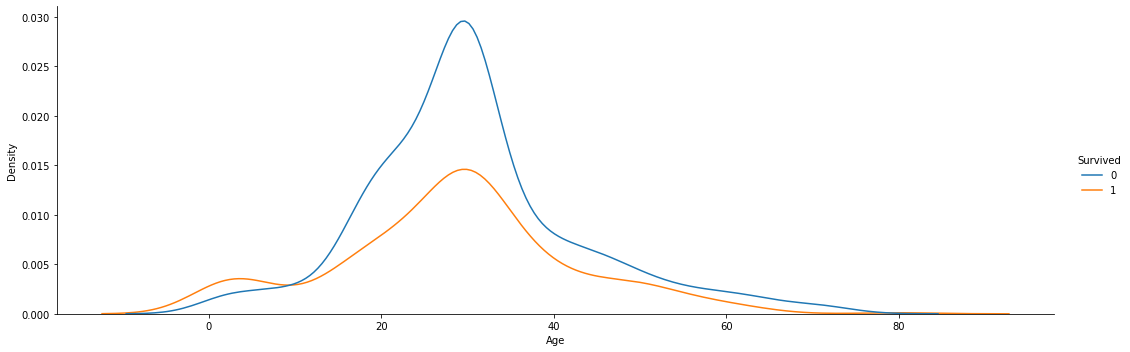

In [22]:
# cell19
sns.displot(df, x="Age", hue="Survived", kind="kde",aspect = 3)

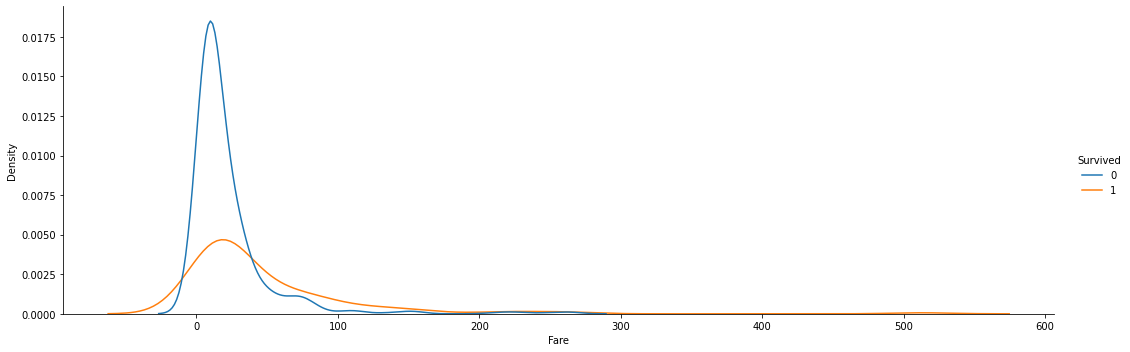

In [23]:
# cell20
sns.displot(df, x="Fare", hue="Survived", kind="kde",aspect = 3)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
با توجه به سلول 18 درصد افرادی که زنده مانده‌اند حدود 38 و درصد افرادی که مرده‌اند حدود 62 درصد است.<br>
    در نمودار سلول 19 و 20 توزیع افراد نجات یافته و مرده بر اساس سن و کرایه‌ای که پرداخت کرده‌اند مشخص شده است. با توجه به نتیجه‌ای که از سلول ۱۸ حاصل شد انتظار داریم همواره نمودار نارنجی که مربوط به نجات یافتگان است پایین نمودار آبی باشد اما با توجه به نمودارها متوجه می‌شویم که  حدودا در در بین مسافران زیر ۵ سال بیشتر مسافران نجات پیدا کرده اند. همچنین اتفاقی برای مسافرانی که بیش از 50 دلار کرایه پرداخت کرده اند نیز مشاهده می‌شود.<br>
    بنابراین از این نمودارها می‌توان نتیجه گرفت که در نجات مسافران و تخصیص قایق‌های نجات اولویت با کودکان و همچنین مسافران متمول‌تر بوده است.

In [24]:
#cell21
pd.crosstab(df.Survived , df.Sex , normalize= 'columns')*100

Sex,0,1
Survived,,
0,25.961538,81.109185
1,74.038462,18.890815


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
با توجه به جدول بالا 81 درصد از مردان مرده اند این در حالی است که فقط 25 درصد از زنان نتوانست‌اند نجات بیابند.<br>
بنابراین می‌توان نتیجه گرفت که اولویت اصلی در نجات مسافران با زنان بوده است.

In [25]:
#cell22
pd.crosstab(df.Survived , 2*(1-df['Pclass = 1'])+(1-df['Pclass = 2'])  , normalize= 'columns')*100

col_0,1,2,3
Survived,,,
0,37.383178,52.717391,75.763747
1,62.616822,47.282609,24.236253


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
همچنین در جدول بالا نیز درصد نجات یافتگان هر Pclass مشخص شده است که بر اساس آن مشخص است که هر چه کلاس بهتر باشد احتمال نجات یافتن بیشتر بوده است.<br>
    63 درصد از مسافران کلاس 1، 47 درصد از مسافران کلاس 2 و 24 درصد از مسافران کلاس 3 از کشتی نجات یافته‌اند.

In [26]:
#cell22
pd.crosstab(df.Survived , df.SibSp )

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,208,112,13,4,3,0,0


In [27]:
pd.crosstab(df.Survived ,df.Parch  )

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,231,65,40,3,0,1,0


<AxesSubplot:>

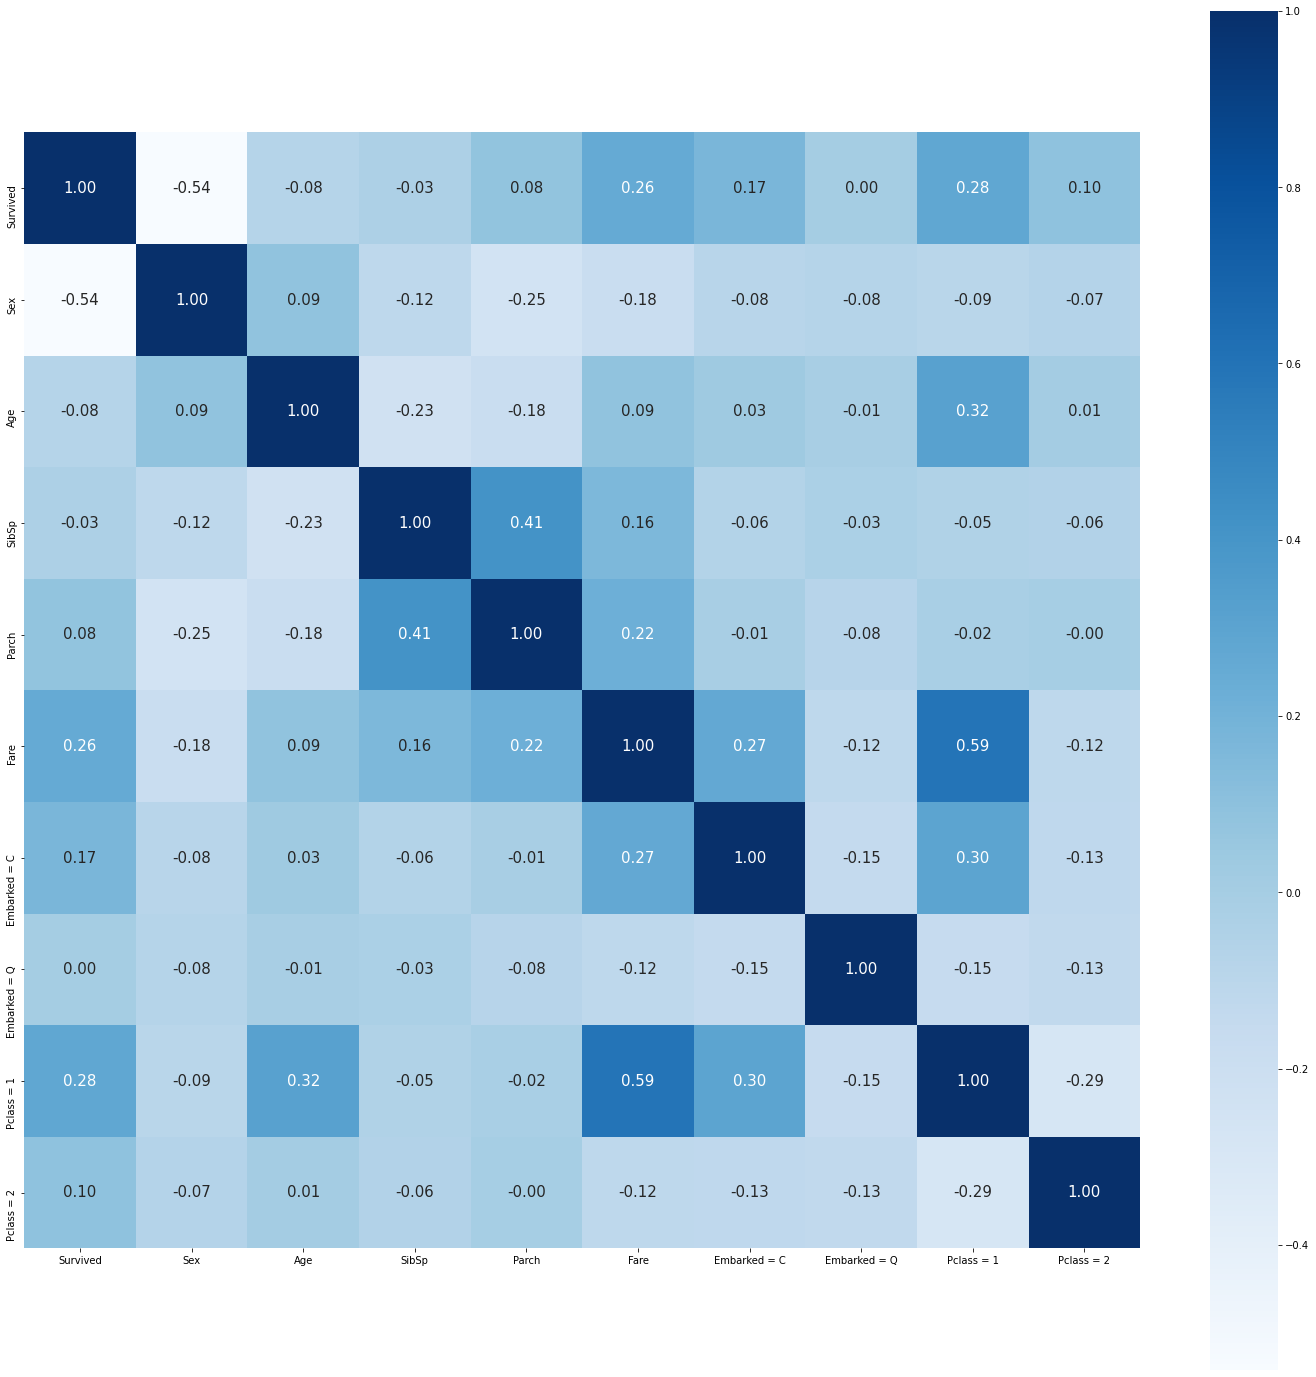

In [28]:
# cell24
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Blues')

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
با توجه به جدول‌های بالا و همچنین کورلیشن فیچر‌ها با ستون Survived به نظر تعداد اعضای خانواده ارتباط زیادی با احتمال زنده ماندن و یا نماند ندارد. اگرچه می‌توان نتیجه گرفت اگر خواهر و برادر‌های شخصی زیاد باشد احتمال زنده ماندن آن خیلی کم است اما این نتیجه گیری منطقی نیست و به نظر به دلیل کم بودن نمونه‌ها نتایج به این شکل در آمده است.

In [29]:
#cell25
df = df[['Survived','Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked = C',
       'Embarked = Q', 'Pclass = 1', 'Pclass = 2']]

test_df = test_df[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked = C',
       'Embarked = Q', 'Pclass = 1', 'Pclass = 2']]

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در ادامه برای آموزش و تعیین کارایی و دقت هر مدل نیاز داریم تا دیتای لیبل دار (df) خود را به دو بخش train و test تقسیم کنیم. حال برای جلوگیری از اشتباه شدن دیتای test لیبل دار با دیتای test_df، دیتای بدون لیبل خود که در انتها از آن استفاده می‌کنیم را با نام X_result نشان می‌دهیم.

In [30]:
#cell26
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
mm = MinMaxScaler()
X[:, :4] = mm.fit_transform(X[:, :4])

X_result = test_df.values
mm2 = MinMaxScaler()
X_result[:, :4] = mm2.fit_transform(X_result[:, :4])

X

array([[0.27117366, 0.125     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4722292 , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37170143, 0.125     , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.39683338, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در نهایت نیز داده‌هایی که بین صفر و یک نیستند (سن، کرایه، تعداد خواهد برادر و تعداد فرزندان) را با MaxMinScaler به اعدادی بین صفر و یک تبدیل می‌کنیم. به این دلیل از این اسکیلر استفاده می‌کنیم که باقی فیچرها نیز بین صفر و یک هستند.<br>
    همچنین فیچر‌ها و لیبل (X و y) را از هم جدا می‌کنیم.

## Train your model (Classification)

In [31]:
#cell27
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(711, 9)
(711,)
(178, 9)
(178,)


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در ادامه‌ی کار مدل‌های مختلف را بر روی مدل learn می‌کنیم. در مدل‌های sklearn دو سلول اول بدون tune کردن پارامتها learn شده اند. خروجی سلول اول میانگین accuracy برای cross_validation با k=10 (برای دیتای learn) است. خروجی سلول دوم نیز گزارش طبقه‌بندی را نشان می‌دهد که برای ما پارامتر accuracy اهمیت دارد. همچنین confusion_matrix برای هر مدل (برای دیتای test) رسم شده است.<br>
    در سلول سوم نیز با دستور GridSearch پارامترهای مناسب برای مدل را پیدا می‌کنیم. خروجی سلول سوم میانگین accuracy بر روی دیتای learn (برای cross_validation با k=10) و همچنین بهترین پارامترها برای آن مدل است.<br>
    در سلول چهارم نیز مدل با پارامترهای بدست آماده در سلول سوم آموزش می‌بیند و در انتها نتایج طبقه بندی بر روی دیتای test برای این حالت نیز نمایش داده می‌شود.

## Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_Logistic = logreg.predict(X_test)
accuracies = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


Accuracy: 78.19 %


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       119
           1       0.81      0.78      0.79        59

    accuracy                           0.87       178
   macro avg       0.85      0.84      0.85       178
weighted avg       0.86      0.87      0.86       178



<AxesSubplot:>

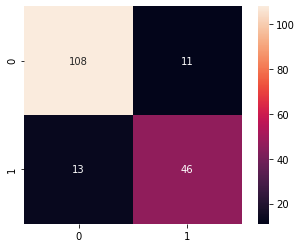

In [33]:
print(metrics.classification_report(y_test, y_pred_Logistic))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_Logistic), square=True , annot=True, fmt='g')

In [34]:
parameters = [{'C': [0.2, 0.4, 0.6, 0.8, 1], 'penalty': ['l2', 'none'],'solver':['newton-cg','lbfgs','sag']},
              {'C': [0.2, 0.4, 0.6, 0.8, 1], 'penalty': ['l1', 'l2'],'solver':['saga','liblinear']}]
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 78.62 %
Best Parameters: {'C': 0.2, 'penalty': 'none', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.89      0.90      0.90       119
           1       0.79      0.78      0.79        59

    accuracy                           0.86       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.86      0.86      0.86       178



<AxesSubplot:>

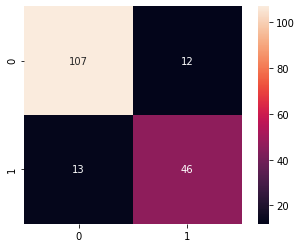

In [35]:
logreg2 = LogisticRegression(penalty='none' , C=0.2 , solver='newton-cg')
logreg2.fit(X_train, y_train)
y_pred_Logistic2 = logreg2.predict(X_test)

print(metrics.classification_report(y_test, y_pred_Logistic2))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_Logistic2), square=True , annot=True, fmt='g')

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FCC558; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در اینجا دقت بر روی دیتای test کاهش یافته است.<br>
    در GridSearch دقت برای دیتای train بیشینه مقدار می‌شود (همانطور که مشخص است دقت بر روی دیتای train از78.19 به 78.62 رسیده است.) اما لزوما این مقدار برای دیتای test نیز افزایش نمیابد. گرچه با cross_validation سعی می‌شود از این اتفاق جلوگیری شود اما به دلیل اینکه دیتاست کوچک است این اتفاق افتاده است.

## KNN

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 78.34 %


              precision    recall  f1-score   support

           0       0.90      0.87      0.88       119
           1       0.75      0.80      0.77        59

    accuracy                           0.84       178
   macro avg       0.82      0.83      0.83       178
weighted avg       0.85      0.84      0.84       178



<AxesSubplot:>

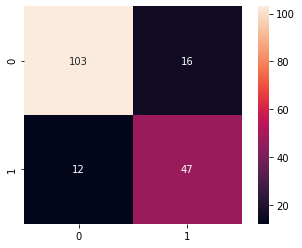

In [37]:
print(metrics.classification_report(y_test, y_pred_knn))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), square=True , annot=True, fmt='g')

In [38]:
parameters = [{'weights': ['uniform','distance'], 'algorithm': ['auto', 'ball_tree','kd_tree','brute'] 
               ,'n_neighbors':[3,5,7,9,11], 'leaf_size':[15,20,25,30,35,40,45]}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 78.47 %
Best Parameters: {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 3, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       119
           1       0.82      0.78      0.80        59

    accuracy                           0.87       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.87      0.87      0.87       178



<AxesSubplot:>

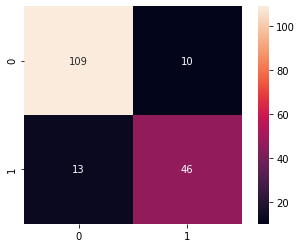

In [39]:
knn2 = KNeighborsClassifier(algorithm='auto' , leaf_size=40 , n_neighbors=3 , weights='uniform' )
knn2.fit(X_train, y_train)
y_pred_knn2 = knn2.predict(X_test)

print(metrics.classification_report(y_test, y_pred_knn2))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn2), square=True , annot=True, fmt='g')

## Navie Bayes

In [40]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
y_pred_Bayes  =  NBclassifier.predict(X_test)
accuracies = cross_val_score(estimator = NBclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 76.37 %


              precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.74      0.71      0.72        59

    accuracy                           0.82       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



<AxesSubplot:>

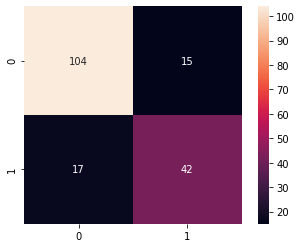

In [41]:
print(metrics.classification_report(y_test, y_pred_Bayes))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_Bayes), square=True , annot=True, fmt='g')

In [42]:
parameters = [{'var_smoothing': [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}]
grid_search = GridSearchCV(estimator = NBclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 76.37 %
Best Parameters: {'var_smoothing': 1e-11}


              precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.74      0.71      0.72        59

    accuracy                           0.82       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



<AxesSubplot:>

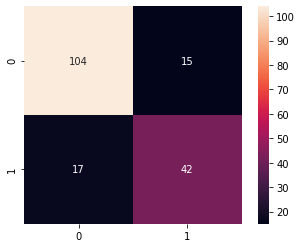

In [43]:
NBclassifier2 = GaussianNB(var_smoothing = 1e-11 )
NBclassifier2.fit(X_train, y_train)
y_pred_Bayes2 = NBclassifier2.predict(X_test)

print(metrics.classification_report(y_test, y_pred_Bayes2))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_Bayes2), square=True , annot=True, fmt='g')

## ANN

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FCC558; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
برای شبکه‌های عصبی چهار حالت ایجاد لایه‌ها و نود‌های شبکه را امتحان می‌کنیم که در نهایت آخرین شبکه‌ی عصبی ساخته شده با دقت 89 درصد بهترین عملکرد را دارد.

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       119
           1       0.87      0.76      0.81        59

    accuracy                           0.88       178
   macro avg       0.88      0.85      0.86       178
weighted avg       0.88      0.88      0.88       178



<AxesSubplot:>

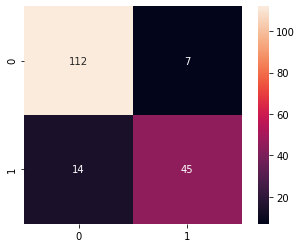

In [44]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose=0)
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

print(metrics.classification_report(y_test, y_pred_ann))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_ann), square=True , annot=True, fmt='g')

6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       119
           1       0.83      0.76      0.80        59

    accuracy                           0.87       178
   macro avg       0.86      0.84      0.85       178
weighted avg       0.87      0.87      0.87       178



<AxesSubplot:>

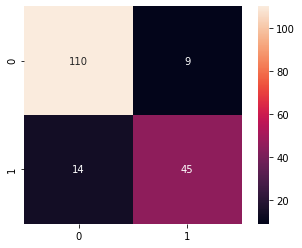

In [45]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 200,verbose=0)
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

print(metrics.classification_report(y_test, y_pred_ann))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_ann), square=True , annot=True, fmt='g')

6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       119
           1       0.89      0.69      0.78        59

    accuracy                           0.87       178
   macro avg       0.88      0.83      0.84       178
weighted avg       0.87      0.87      0.87       178



<AxesSubplot:>

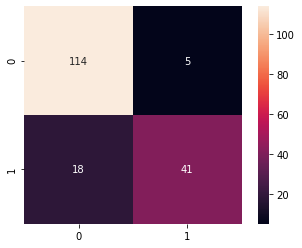

In [46]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose=0)
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.6)

print(metrics.classification_report(y_test, y_pred_ann))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_ann), square=True , annot=True, fmt='g')

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       119
           1       0.92      0.75      0.82        59

    accuracy                           0.89       178
   macro avg       0.90      0.86      0.87       178
weighted avg       0.90      0.89      0.89       178



<AxesSubplot:>

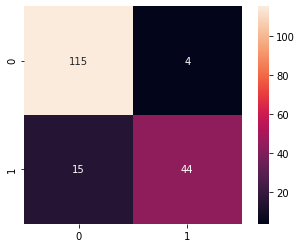

In [47]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose=0)
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.6)

print(metrics.classification_report(y_test, y_pred_ann))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_ann), square=True , annot=True, fmt='g')

## SVM (SVC)

In [48]:
svclassifier = SVC()
svclassifier.fit(X_train, y_train)
y_pred_svm = svclassifier.predict(X_test)
accuracies = cross_val_score(estimator = svclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 79.46 %


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       119
           1       0.91      0.71      0.80        59

    accuracy                           0.88       178
   macro avg       0.89      0.84      0.86       178
weighted avg       0.89      0.88      0.88       178



<AxesSubplot:>

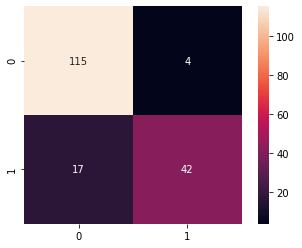

In [49]:
print(metrics.classification_report(y_test, y_pred_svm))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_svm), square=True , annot=True, fmt='g')

In [50]:
parameters = [{'C': [0.2, 0.4, 0.6, 0.8, 1] , 'kernel':['linear','poly','rbf','sigmoid'] ,'degree':[1,2,3,4],
              'gamma':['scale','auto',0.2,0.4,0.6,0.8,1]}]
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 80.45 %
Best Parameters: {'C': 0.6, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       119
           1       0.91      0.73      0.81        59

    accuracy                           0.89       178
   macro avg       0.90      0.85      0.87       178
weighted avg       0.89      0.89      0.88       178



<AxesSubplot:>

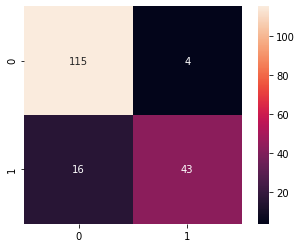

In [51]:
svclassifier2 = SVC(C= 0.6, degree= 3, gamma= 1, kernel= 'poly' )
svclassifier2.fit(X_train, y_train)
y_pred_svm2 = svclassifier2.predict(X_test)

print(metrics.classification_report(y_test, y_pred_svm2))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_svm2), square=True , annot=True, fmt='g')

## Decision Tree

In [52]:
DTclassifier = DecisionTreeClassifier(random_state = 0)
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_test)
accuracies = cross_val_score(estimator = DTclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 77.36 %


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       119
           1       0.74      0.66      0.70        59

    accuracy                           0.81       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.81      0.81      0.81       178



<AxesSubplot:>

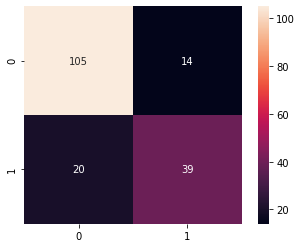

In [53]:
print(metrics.classification_report(y_test, y_pred_dt))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), square=True , annot=True, fmt='g')

In [54]:
parameters = [{'criterion': ['gini','entropy','log_loss'] , 'splitter':['best'] ,'min_samples_split':[2,3,4,5,6],
              'min_samples_leaf':[1,2,3,4] , 'max_features':['auto','sqrt','log2',None]} ]
grid_search = GridSearchCV(estimator = DTclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 81.57 %
Best Parameters: {'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


              precision    recall  f1-score   support

           0       0.87      0.92      0.90       119
           1       0.83      0.73      0.77        59

    accuracy                           0.86       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.86      0.86      0.86       178



<AxesSubplot:>

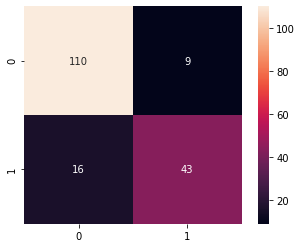

In [55]:
DTclassifier2 = DecisionTreeClassifier(criterion='gini',max_features=None,min_samples_leaf=4,min_samples_split=2,splitter='best')
DTclassifier2.fit(X_train, y_train)
y_pred_dt2 = DTclassifier2.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dt2))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt2), square=True , annot=True, fmt='g')

## Random Forest

In [56]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 79.18 %


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       119
           1       0.72      0.71      0.72        59

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



<AxesSubplot:>

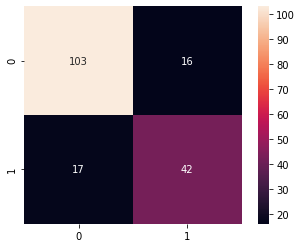

In [57]:
print(metrics.classification_report(y_test, y_pred_rfc))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_rfc), square=True , annot=True, fmt='g')

In [58]:
parameters = [{'n_estimators': [50,75,100,150,200,250,300,400] ,'criterion': ['gini','entropy','log_loss'],
              'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3,4] , 'max_features':['sqrt','log2',None]} ]
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 82.28 %
Best Parameters: {'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       119
           1       0.72      0.71      0.72        59

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



<AxesSubplot:>

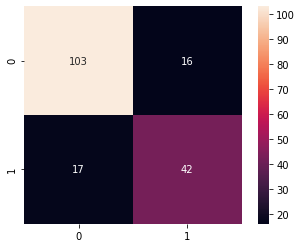

In [59]:
rfc2 = RandomForestClassifier(criterion= 'gini', max_features= None, min_samples_leaf= 2, min_samples_split= 6, n_estimators= 150)
rfc2.fit(X_train, y_train)
y_pred_rfc2 = rfc2.predict(X_test)

print(metrics.classification_report(y_test, y_pred_rfc))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_rfc), square=True , annot=True, fmt='g')

## XGBoost

In [60]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)
y_pred_XGB = XGBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       119
           1       0.71      0.68      0.70        59

    accuracy                           0.80       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178



<AxesSubplot:>

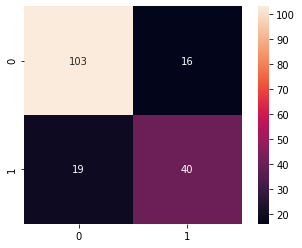

In [61]:
print(metrics.classification_report(y_test, y_pred_XGB))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_XGB), square=True , annot=True, fmt='g')

In [62]:
# # The full pipeline as a step in another pipeline
# # with an estimator as the final step.
# pipe = Pipeline(
#           steps = [("fs", SelectKBest()),
#                    ("clf", XGBClassifier())])
# # Creating a dictionary with the hyperparameters.
# search_space = [
#      {"clf": [RandomForestClassifier()],
#       "clf__n_estimators": [800],
#       "clf__criterion": ["gini", "entropy"],
#       "clf__max_leaf_nodes": [300],
#       "clf__random_state": [42],
#       "clf__oob_score": [True],
#       "fs__k": [10]},
#      {"clf": [XGBClassifier()],
#       "clf__n_estimators": [300],
#       "clf__max_depth": [4],
#       "clf__learning_rate": [0.1],
#       "clf__random_state": [42],
#       "clf__subsample": [1],
#       "clf__colsample_bytree": [1],
#       "clf__tree_method": ["gpu_hist"],  # For using the GPU.
#       "fs__k":[13]}
# ]
# # Defining StratifiedKFold object -> 10-StratifiedFolds
# kfold = StratifiedKFold(n_splits=10,
#                         random_state=42, shuffle=True)
# # Creating the GridSearchCV object.
# grid = GridSearchCV(estimator=pipe, 
#                     param_grid=search_space,
#                     cv=kfold,
#                     scoring='accuracy',  # Accuracy
#                     return_train_score=True,
#                     n_jobs=-1,
#                     refit="AUC")  # AUC == ROC
# # Fitting the GridSearchCV object.
# best_model = grid.fit(X_train, y_train)

In [63]:
# best_accuracy = best_model.best_score_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# best_parameters = best_model.best_params_
# print("Best Parameters:", best_parameters)

## Test Result

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در نهایت همانطور که مشخص شد، بیشترین دقت بر روی دیتای test مربوط به شبکه‌ی سوم و چهارم در روش ANN (شبکه‌های عصبی)و مدل tune شده‌ی روش SVM با 89 درصد بود. که در نهایت روش SVM را برای پیشبینی مقادیر X_result استفاده می‌کنیم.<br>
    با توجه به نتایج گزارش شده همانطور که انتظار داشتیم در مدل‌هایی که با روش GridSearch به تنظیم کردن پارامترها پرداختیم، دقت بر روی دیتای learn افزایش یافت. (به جز مدل Naive Bayes که برابر با همان مقدار ماند). به علاوه دقت بر روی دیتای test در برخی مدل‌ها افزایش قابل توجهی داشت و در برخی نیز تغییر آنچنانی نکرد. البته همانطور که اشاره شد در روش رگرسیون لجستیک به دلایل ذکر شده دقت کاهش یافت.<br>
    در بخش آخر با مدل SVM لیبل دیتای فایل (test) را پیشبینی و نتایج را در فایل report.csv ذخیره می‌کنیم.

In [64]:
main_classifier = SVC(C= 0.6, degree= 3, gamma= 1, kernel= 'poly' )
main_classifier.fit(X_train, y_train)
y_result = svclassifier2.predict(X_result)

In [65]:
result=pd.DataFrame({'PassengerId':X_result_ID,'Survived':y_result})
result.to_csv('report.csv',index=False)